In [13]:
import os
import json
import shutil
import pandas as pd
import numpy as np
from tqdm import tqdm
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import random, math

In [6]:
# Load Maureens annotations
csv_files = glob('data/sites/csv/**/*.csv', recursive=True)
sorted_csv_files = sorted(csv_files, key=lambda x: x.split('/')[-1])
initialiser, remainder = sorted_csv_files[0], sorted_csv_files[1:]
df = pd.read_csv(initialiser, encoding="ISO-8859-1")
for file in remainder:
    site = pd.read_csv(file, encoding="ISO-8859-1")
    df = pd.concat([df, site])
    
df['subdir_video'] = df.subfolder.astype(str) + '_' + df.video_file_name.astype(str)
df.subdir_video = df.subdir_video.apply(lambda x: x.lower())
df.subdir_video = df.subdir_video.str.split('.').str[0]
df['prepend_zero'] = df.subdir_video.apply(lambda x: f'{"_".join(x.split("_")[:-1])}_{"0" + x.split("_")[-1]}')

In [ ]:
# Load filepaths from Jade2
jf = pd.read_csv('data/jade2/chimp_videos.csv', index_col=False)
jf.drop(columns=['Unnamed: 0'], inplace=True)
jf.files = jf.files.apply(lambda x: x.split('.')[0].lower())
matching1 = df[df.subdir_video.isin(jf.files.values)]

# Handling missing zeros
matching2 = df[df.prepend_zero.isin(jf.files.values)]
matching2.drop(columns=['subdir_video'], inplace=True)
matching2.rename(columns={"prepend_zero": "subdir_video"}, inplace=True)

# Concatenate matching dataframes
multi_label_df = pd.concat([matching1, matching2])
multi_label_df.drop(columns=['prepend_zero'], inplace=True)
multi_label_df[multi_label_df.subdir_video.isin(jf.files)]

In [8]:
multi_label_df

,new_row_id,country,research_site,genus,species,cam_coverage_area,location_metadata,habitat,utm_zone,utm_long,...,sex,tool_use,vocalization,bipedal,camera_reaction,behavioral_context,other_species,additional_comments,record_type,subdir_video
0,1,mali,bafing,Pan,troglodytes verus,9.87,trail,forest on rock,29n,342661.0,...,male,no,no,no,no,travel,NaN,Not very clear screen,60s_video,baf_vid1_0342661_1432807_20141103_11160014
5,6,mali,bafing,Pan,troglodytes verus,14.00,feeding site/fruit tree,gallery forest,29n,346467.0,...,male,no,no,no,yes,feeding,NaN,"Near the camera, with a fruit in his mouth",60s_video,baf_vid10_0346467_1436892_20151112_11280025
10,11,mali,bafing,Pan,troglodytes verus,7.00,water source,forest on rock,29n,343264.0,...,female,no,no,no,no,resting,NaN,Carries an infant ventrally,60s_video,baf_vid11_0343264_1434832_20151019_12100066
11,12,mali,bafing,Pan,troglodytes verus,7.00,water source,forest on rock,29n,343264.0,...,unclear,no,no,no,no,resting,NaN,Rides ventrally on the above chimp,60s_video,baf_vid11_0343264_1434832_20151019_12100066
12,13,mali,bafing,Pan,troglodytes verus,7.00,water source,forest on rock,29n,343264.0,...,female,no,yes,no,yes,resting,NaN,At the top right side of the screen. Seems to ...,60s_video,baf_vid11_0343264_1434832_20151019_12100066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,964,guinea,sobory,Pan,troglodytes verus,80.00,trail,gallery forest,29n,255619.0,...,male,no,no,no,no,travel,NaN,NaN,60s_video,sob_vid05_0255619_1305651_20160319_03220020
964,965,guinea,sobory,Pan,troglodytes verus,80.00,trail,gallery forest,29n,255619.0,...,unclear,no,no,no,yes,travel,NaN,NaN,60s_video,sob_vid05_0255619_1305651_20160319_03220020
965,966,guinea,sobory,Pan,troglodytes verus,80.00,trail,gallery forest,29n,255619.0,...,male,no,no,no,yes,travel,NaN,NaN,60s_video,sob_vid05_0255619_1305651_20160319_03220020
966,967,guinea,sobory,Pan,troglodytes verus,80.00,trail,gallery forest,29n,255619.0,...,male,no,no,no,yes,travel,NaN,NaN,60s_video,sob_vid05_0255619_1305651_20160319_03220020


**Extreme example**

In [16]:
extreme_example = multi_label_df[multi_label_df.subdir_video=='fouta_vid18b_260760_1292882_20140524_pict0122'][['behavioral_context','additional_comments']]

In [38]:
multi_label_df[['additional_comments']].dropna().values

array([['Not very clear screen'],
       ['Near the camera, with a fruit in his mouth'],
       ['Carries an infant ventrally'],
       ...,
       ['carrying a cane in the mouth'],
       ['carrying a cane in the mouth'],
       ['dorsal infant']], dtype=object)

In [60]:
embeddings[0].shape

(1, 768)

In [81]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L12-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/573 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [79]:
comments = multi_label_df[['additional_comments']].dropna().additional_comments.unique()
embeddings = [model.encode(c) for c in tqdm(comments)]
embeddings = np.concatenate(embeddings, axis=0)

100%|██████████| 10696/10696 [04:57<00:00, 35.98it/s]


In [76]:
# The default of 1,000 iterations gives fine results, but I'm training for longer just to eke
# out some marginal improvements. NB: This takes almost an hour!
tsne = TSNE(random_state=1, n_iter=1000, metric="cosine")

embs = tsne.fit_transform(embeddings)
# Add to dataframe for convenience
x = embs[:, 0]
y = embs[:, 1]

/home/dl18206/anaconda3/envs/dataset-upgrade/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/dl18206/anaconda3/envs/dataset-upgrade/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


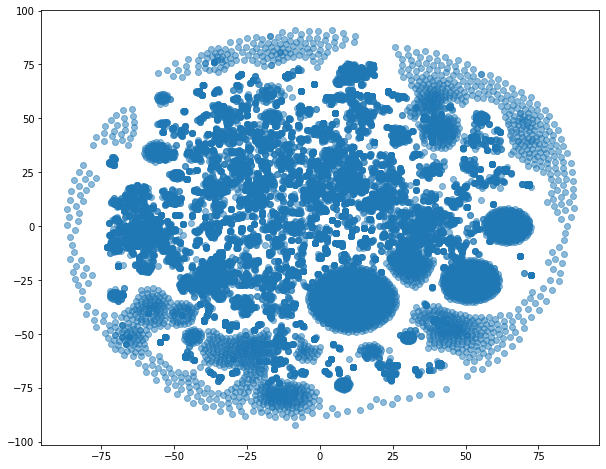

In [80]:
FS = (10, 8)
fig, ax = plt.subplots(figsize=FS)
# Make points translucent so we can visually identify regions with a high density of overlapping points
ax.scatter(x, y, alpha=0.5);